In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
%pip install geopandas rioxarray earthpy

Note: you may need to restart the kernel to use updated packages.


In [112]:
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

sns.set(font_scale=1.5, style="darkgrid")

In [113]:
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [114]:
dem_pre_path = os.path.join("colorado-flood",
                            "spatial", 
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)

dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [115]:
dtm_pre_arr.rio.crs

CRS.from_epsg(32613)

In [116]:
dtm_pre_arr.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [117]:
#check to see there is data
dtm_pre_arr.rio.nodata

-3.4028235e+38

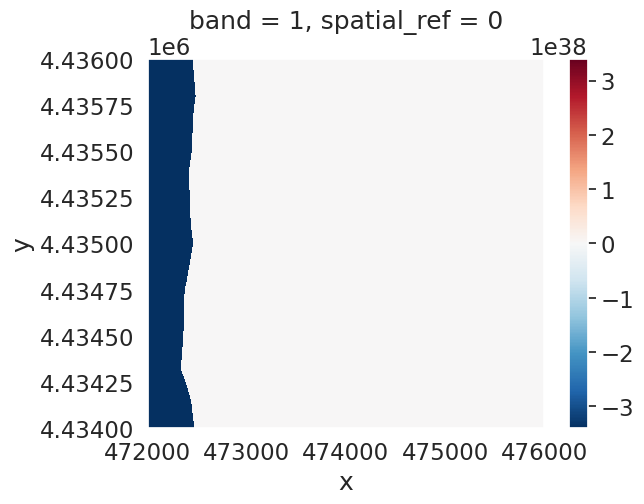

In [118]:
dtm_pre_arr.plot()
plt.show()

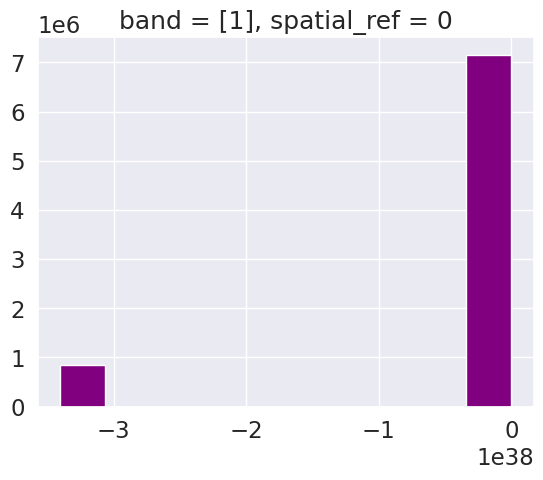

In [119]:
dtm_pre_arr.plot.hist(color="purple")
pit.show()

In [120]:
dtm_pre_arr.values

array([[[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956300e+03,  1.6954199e+03,  1.6954299e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6956000e+03,  1.6955399e+03,  1.6953600e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6953800e+03,  1.6954399e+03,  1.6953700e+03],
        ...,
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6814500e+03,  1.6813900e+03,  1.6812500e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6817200e+03,  1.6815699e+03,  1.6815599e+03],
        [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
          1.6818900e+03,  1.6818099e+03,  1.6817400e+03]]], dtype=float32)

In [121]:
#QA/QC data
np.nanmin(dtm_pre_arr.values)

-3.4028235e+38

In [122]:
#QA/QC data
np.nanmax(dtm_pre_arr.values)

2087.43

In [123]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [124]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()

dtm_pre_arr.shape

(2000, 4000)

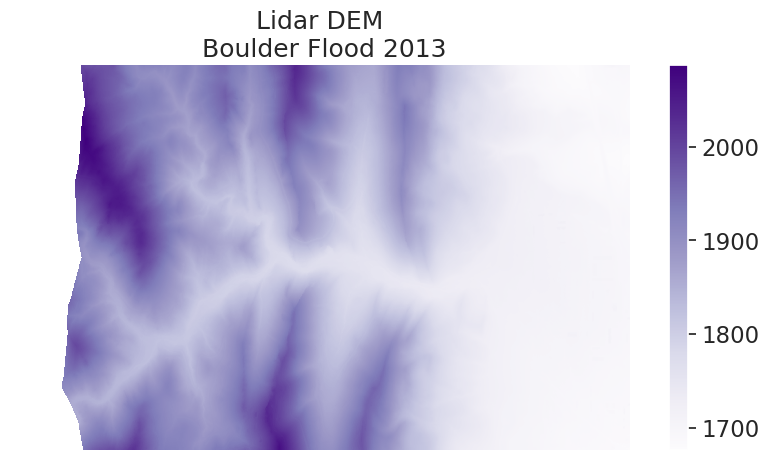

In [126]:
f, ax = plt.subplots(figsize=(10,5))

dtm_pre_arr.plot(cmap="Purples", ax=ax)

ax.set_title("Lidar DEM\n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

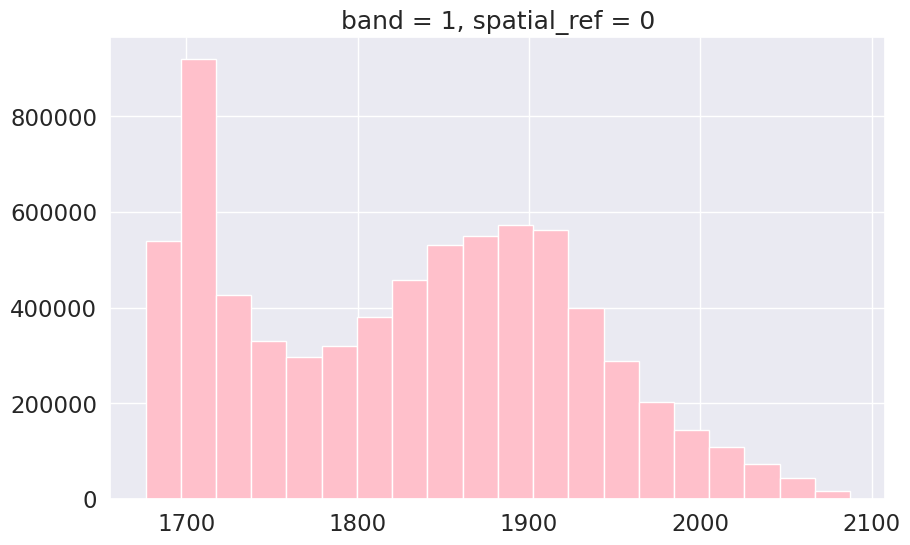

In [132]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="pink", bins=20)
plt.show()

In [133]:
#QA/QC data
np.nanmin(dtm_pre_arr.data)

1676.21

In [134]:
#QA/QC data
np.nanmax(dtm_pre_arr.data)

2087.43

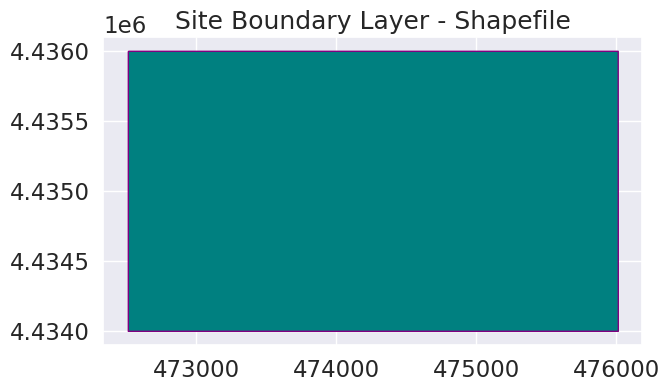

In [138]:
site_bound_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color="teal", edgecolor="purple", ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

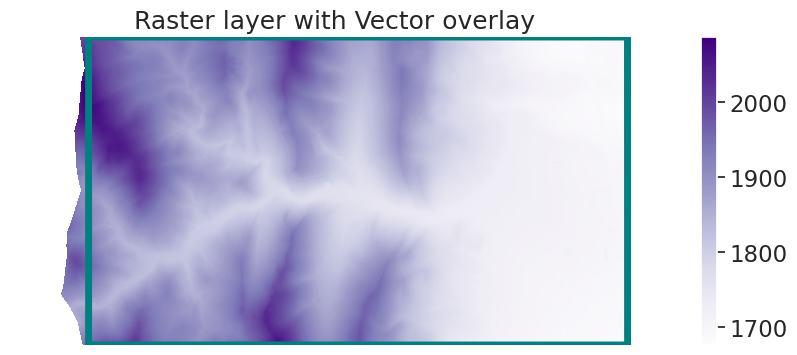

In [145]:
f, ax = plt.subplots(figsize=(11,4))

dtm_pre_arr.plot.imshow(cmap="Purples", ax=ax)

site_bound_shp.plot(color="None", edgecolor="teal", linewidth=5, zorder=1, ax=ax)

ax.set(title="Raster layer with Vector overlay")
ax.axis("off")
plt.show()